In [1]:
# this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
  #  to predict the closing stock price of corp (apple) using past 60 day stock price
    
    #import libraries
    
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#get the stock quote

df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-01-01')

#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273


In [3]:
#get number of rows and columns

df.shape

(2265, 6)

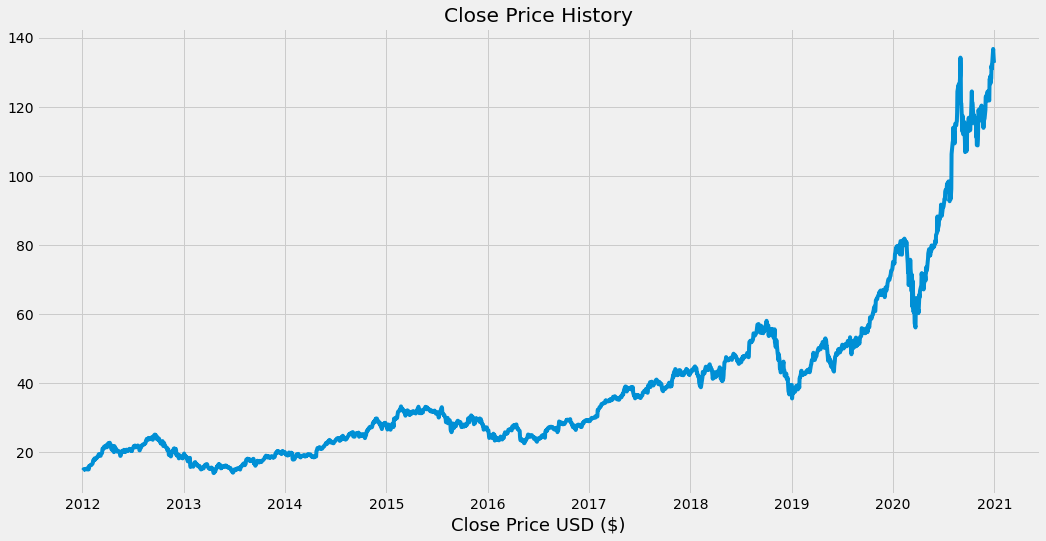

In [4]:
#visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.xlabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#create a new dataFrame with only the close column

data = df.filter(['Close'])

#convert the dataframe to a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1812

In [6]:
#scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [8]:
#create the training data set
#create the scaled traing data set

train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]



In [9]:
#convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)


In [10]:
#reshape the data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [11]:
#build the LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model

model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#train the model

model.fit(x_train, y_train,batch_size=1,epochs=1)

1752/1752 [==============================] - 27s 14ms/step - loss: 2.7742e-04


In [14]:
#create the testing data set
#create a new array containing scaled values from index 1752 to 2200

test_data = scaled_data[training_data_len -60:, :]

#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#convert the data to numpy array

x_test = np.array(x_test)

In [17]:
#reshape the array

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
#get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#get the root mean squared error (RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.8493245442708335

<ipython-input-20-f5c6c5e82f9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


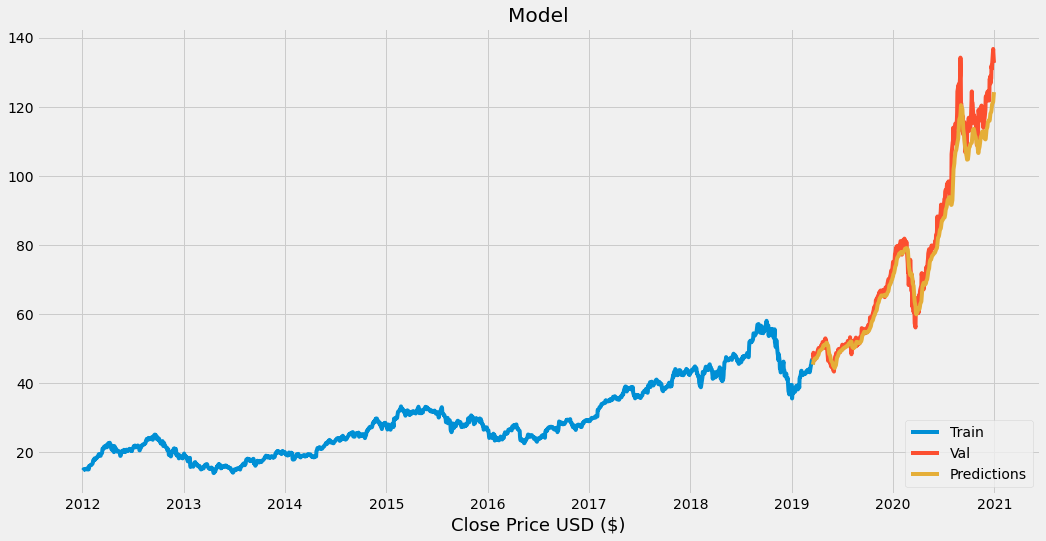

In [20]:
#plot the data

train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions'] = predictions

#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.xlabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [21]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,45.322582
2019-03-20,47.040001,45.693436
2019-03-21,48.772499,46.028614
2019-03-22,47.762501,46.501812
2019-03-25,47.185001,46.876877
...,...,...
2020-12-24,131.970001,120.627312
2020-12-28,136.690002,121.378822
2020-12-29,134.869995,122.543350
